# Project: Investigate a Dataset (TMDb)
### by Gabe Garcia

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Methodology**: For this project, I will be investigating the TMDb movie dataset, which contains information about 10,000 movies collected from The Movie Database (TMDb). Throughout the course of the report, I hope to uncover insights on attributes of recent succesful movies. The dataset has information on popularity, budget, revenue and release date and I will explore how these variables relate to one another. 
More specifically, I will answer the questions "does adjusted revenue correlate to a movie's popularity?" and "does adjusted profit correlate to a movie's popularity?" Finally, I will determine whether movies in the top quartile for adjusted revenue are also in the top quartile for adjusted profit.
>
>


In [302]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> Here, I load in the data, review the data structure, check for null values, review summary statistics for float and integer columns and then trim and clean the dataset for analysis.

### General Properties

In [303]:
# Perform operations to look for instances of missing or possibly errant data

# Read CSV
df = pd.read_csv("tmdb-movies.csv")

# Display first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [304]:
# Inspect column data types and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [305]:
# Display summary statistics for float and int columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


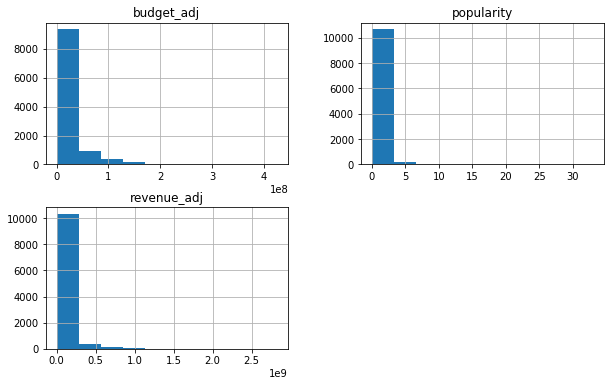

In [360]:
# Display Histograms
df[["budget_adj","revenue_adj","popularity"]].hist(figsize=(10,6));

Notice that for these three fields, the data is right-skewed. The histograms explain that there is a drastic difference in budget and revenue for top films. Additionally, majority of movies have a popularity score below 5, which indicates the limited number of movies that have people's attention. 

### Data Cleaning 

In [306]:
# Display value counts for release_year column
df["release_year"].value_counts().head(16)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
Name: release_year, dtype: int64

In [307]:
# Get subset of data only containing movies that were released from 2011 onwards
df_2011 = df.query('release_year >=2011')
df_2011.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [308]:
# Display value counts for release_year column and confirm 2011 is the earliest release year
df_2011["release_year"].value_counts().sort_index(ascending=False)

2015    629
2014    700
2013    659
2012    588
2011    540
Name: release_year, dtype: int64

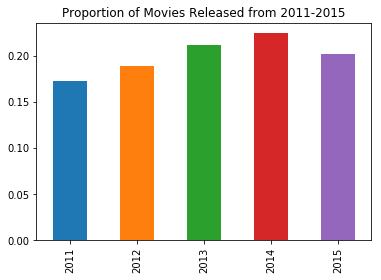

In [309]:
# Plot the proportion of movies released by year for df_2011
df_2011["release_year"].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.title('Proportion of Movies Released from 2011-2015');

In [310]:
# There are 1,971 rows with a revenue_adj value of 0! 
df_2011["revenue_adj"].value_counts().head()

0.000000e+00    1971
3.172146e+07       2
3.391985e+07       1
2.662165e+07       1
3.988480e+05       1
Name: revenue_adj, dtype: int64

In [311]:
# Remove rows with revenue_adj values of 0 
df_2011 = df_2011.query('revenue_adj != 0')
# Validate that the revenue_adj rows with values of 0 were removed
df_2011["revenue_adj"].value_counts().head(10)

3.172146e+07    2
9.830164e+06    1
2.291050e+07    1
1.485243e+08    1
6.870541e+07    1
2.863562e+08    1
3.806378e+06    1
6.396472e+05    1
8.440950e+06    1
7.898558e+05    1
Name: revenue_adj, dtype: int64

In [312]:
# Create quartiles in order to determine each movies' performance relative to other movies (0: lowest revenue_adj values, 4: highest revenue_adj values)
pd.qcut(df_2011["revenue_adj"], 4, labels=False).value_counts().sort_index(ascending=False)

3    286
2    286
1    286
0    287
Name: revenue_adj, dtype: int64

In [313]:
# Add new revenue_adj_quartile column
df_2011["revenue_adj_quartile"]=pd.qcut(df_2011["revenue_adj"], 4, labels=False)

In [314]:
# Validate that new column is added
df_2011.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_adj_quartile
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,3
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,3
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that I've filtered for movies released from 2011-2015 and removed movies with invalid information (i.e. movies that had no revenue) the Exploratory Data Analysis (EDA) process can begin.

I will provide additional statistics and create visualizations with the goal of addressing the research questions. I will explore relationships between variables and determine what consistent attributes exists for the most succesful movies.

### Research Question # 1: How does a movie's `revenue_adj_quartile` relate to its `popularity`?

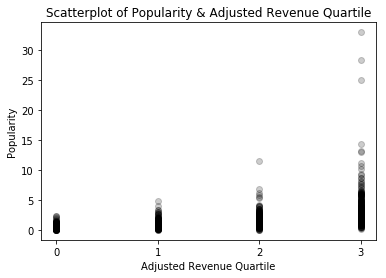

In [315]:
# Begin with a scatter plot visualization
x=df_2011["revenue_adj_quartile"]
y=df_2011["popularity"]
plt.plot(x, y, 'o', color='black',alpha=0.2)
plt.title('Scatterplot of Popularity & Adjusted Revenue Quartile')
plt.xlabel('Adjusted Revenue Quartile')
plt.ylabel('Popularity')
plt.xticks(np.arange(min(x), max(x)+1, 1.0));

Notice the positive relationship between `revenue_adj_quartile` relate to its `popularity`.

### Research Question 2: How does a movie's `profit_adj_quartile` relate to its `popularity`?

I started to think that another financial metric can be incorporated into the analysis. By looking at `profit_adj` (`revenue_adj`-`budget_adj`), I hope to determine if trends from the previous visualization remain consistent. In other words, does profit correlate with popularity the same way that adjusted revenue quartile does?

In [316]:
df_2011["profit_adj"] = df_2011["revenue_adj"] - df_2011["budget_adj"]
df_2011.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_adj_quartile,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,3,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,3,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3,1.210949e+09


In [317]:
# Add new revenue_adj_quartile column
df_2011["profit_adj_quartile"]=pd.qcut(df_2011["profit_adj"], 4, labels=False)

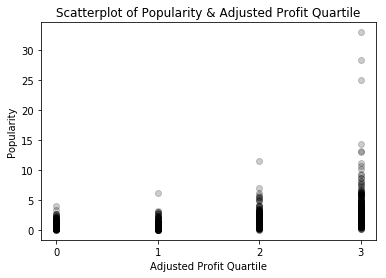

In [318]:
# Begin with a scatter plot visualization
x=df_2011["profit_adj_quartile"]
y=df_2011["popularity"]
plt.plot(x, y, 'o', color='black',alpha=0.2)
plt.title('Scatterplot of Popularity & Adjusted Profit Quartile')
plt.xlabel('Adjusted Profit Quartile')
plt.ylabel('Popularity')
plt.xticks(np.arange(min(x), max(x)+1, 1.0));

Notice the similar relationship between the `profit_adj_quartile` vs `popularity` visualization and the earlier `revenue_adj_quartile` vs `popularity` visualization.

### Research Question 3: Does it follow that movies in the top quartile for `revenue_adj_quartile` are also in the same quartile for `profit_adj_quartile` ?

In [319]:
df_2011_quartile = df_2011.groupby(["revenue_adj_quartile", "profit_adj_quartile"]).size().reset_index(name="count")

In [320]:
df_2011_quartile["revenue_profit_adj_quartile"]= df_2011_quartile["revenue_adj_quartile"].map(str) + ',' + df_2011_quartile["profit_adj_quartile"].map(str)

In [321]:
df_2011_quartile = df_2011_quartile.drop(columns=['revenue_adj_quartile', 'profit_adj_quartile'])

In [322]:
df_2011_quartile = df_2011_quartile.iloc[:,[1,0]]
df_2011_quartile.head()

,revenue_profit_adj_quartile,count
0,"0,0",141
1,"0,1",146
2,"1,0",117
3,"1,1",115
4,"1,2",54


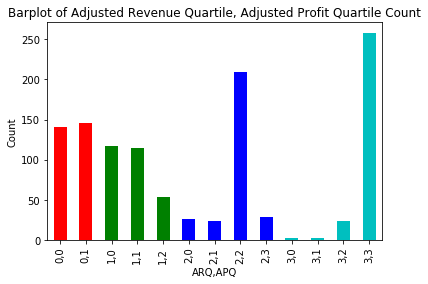

In [323]:
df_2011_quartile.set_index('revenue_profit_adj_quartile').plot(kind='bar',color='rrgggbbbbcccc',legend=False)
plt.title('Barplot of Adjusted Revenue Quartile, Adjusted Profit Quartile Count')
plt.xlabel('ARQ,APQ')
plt.ylabel('Count');

Most of the movies in the top 2 quartiles by `revenue_adj_quartile` are also in the top 2 quartiles for `profit_adj_quartile`. 

In [324]:
df_2011["revenue_profit_adj_quartile"]= df_2011["revenue_adj_quartile"].map(str) + ',' + df_2011["profit_adj_quartile"].map(str)

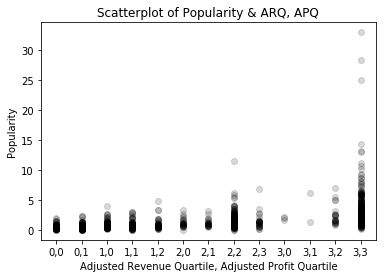

In [342]:
# Begin with a scatter plot visualization

# Sort dataframe
df_2011.sort_values("revenue_profit_adj_quartile", inplace= True)

# Plot steps
x=df_2011["revenue_profit_adj_quartile"]
y=df_2011["popularity"]
plt.plot(x, y, 'o', color='black',alpha=0.15)
plt.title('Scatterplot of Popularity & ARQ, APQ')
plt.xlabel('Adjusted Revenue Quartile, Adjusted Profit Quartile')
plt.ylabel('Popularity');

#### For reference, the detailed value counts for Adjusted Revenue Quartile and Adjusted Profit Quartile are provided below.

In [301]:
df_2011["revenue_profit_adj_quartile"].value_counts()

3,3    258
2,2    209
0,1    146
0,0    141
1,0    117
1,1    115
1,2     54
2,3     28
2,0     26
3,2     23
2,1     23
3,0      3
3,1      2
Name: revenue_profit_adj_quartile, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Revenue** and **Profit** are both correlated with popularity. For this analysis, most of the recent movies that generated the highest revenues also generated the highest profits. However, there were also instances when movies were in the top quartile for revenue and not in the top quartile for profit. Movies that were in the top quartiles for _both_ revenue and profit tend to be very popular.

>**Limitations:** The dataset is non-exhaustive. Not every single movie released in a given year was included. Additionally, the analysis did not explain why some movies had high revenue and low profit. Because of the limited fields and low sample size in the dataset, the project focused on what information was available (e.g. budget, revenue) and feature engineered a profit column in order to obtain insights on movies' financial performance and popularity.
